### Analysis of Arabidopsis ribosome profiling dataset (Wu et al. 2024; PMID: 38000896) using ribotricer

In [1]:
! STAR --runMode genomeGenerate \
 --runThreadN 32 \
--genomeSAindexNbases 12 \
--genomeFastaFiles  ../ref/tair10/TAIR10_chr_all.fas \
--sjdbGTFfile ../ref/tair10/Araport11_GTF_genes_transposons.current.gtf \
--genomeDir  ../ref/tair10/TAIR10_chr_all_star_index

	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode genomeGenerate --runThreadN 32 --genomeSAindexNbases 12 --genomeFastaFiles ../ref/tair10/TAIR10_chr_all.fas --sjdbGTFfile ../ref/tair10/Araport11_GTF_genes_transposons.current.gtf --genomeDir ../ref/tair10/TAIR10_chr_all_star_index
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 11 18:46:17 ..... started STAR run
Feb 11 18:46:17 ... starting to generate Genome files
Feb 11 18:46:18 ..... processing annotations GTF
Feb 11 18:46:21 ... starting to sort Suffix Array. This may take a long time...
Feb 11 18:46:21 ... sorting Suffix Array chunks and saving them to disk...
Feb 11 18:46:31 ... loading chunks from disk, packing SA...
Feb 11 18:46:38 ... finished generating suffix array
Feb 11 18:46:38 ... generating Suffix Array index
Feb 11 18:46:47 ... completed Suffix Array index
Feb 11 18:46:47 ..... inserting junctions into the genome indices
Feb 11 18:47:11 .

In [2]:
! ls ../doc/wu_2024_datasets/*/*.fastq.gz | awk '!/_[1-2].fastq.gz/' \
| while read i; do \
STAR --runMode alignReads \
--runThreadN 32 \
--outFilterType BySJout --outFilterMismatchNmax 2 \
--genomeDir ../ref/tair10/TAIR10_chr_all_star_index \
--readFilesIn ${i} --readFilesCommand zcat \
--outFileNamePrefix "${i%.fastq.gz}"_genomic_ \
--clip3pAdapterSeq AGATCGGAAGAGCACACGTCT \
--outSAMtype BAM SortedByCoordinate \
--quantMode TranscriptomeSAM GeneCounts \
--outFilterMultimapNmax 1 --outFilterMatchNmin 16 \
--alignEndsType EndToEnd --outSAMattributes All; done

	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --runThreadN 32 --outFilterType BySJout --outFilterMismatchNmax 2 --genomeDir ../ref/tair10/TAIR10_chr_all_star_index --readFilesIn ../doc/wu_2024_datasets/SRR15700008/SRR15700008.fastq.gz --readFilesCommand zcat --outFileNamePrefix ../doc/wu_2024_datasets/SRR15700008/SRR15700008_genomic_ --clip3pAdapterSeq AGATCGGAAGAGCACACGTCT --outSAMtype BAM SortedByCoordinate --quantMode TranscriptomeSAM GeneCounts --outFilterMultimapNmax 1 --outFilterMatchNmin 16 --alignEndsType EndToEnd --outSAMattributes All
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 11 18:47:19 ..... started STAR run
Feb 11 18:47:23 ..... loading genome
Feb 11 18:47:26 ..... started mapping
Feb 11 18:49:41 ..... finished mapping
Feb 11 18:49:42 ..... started sorting BAM
Feb 11 18:50:18 ..... finished successfully
	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignR

In [1]:
! /home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --runThreadN 32 --outFilterType BySJout --outFilterMismatchNmax 2 --genomeDir ../ref/tair10/TAIR10_chr_all_star_index --readFilesIn ../doc/wu_2024_datasets/SRR15700010/SRR15700010.fastq.gz --readFilesCommand zcat --outFileNamePrefix ../doc/wu_2024_datasets/SRR15700010/SRR15700010_genomic_ --clip3pAdapterSeq AGATCGGAAGAGCACACGTCT --outSAMtype BAM Unsorted --quantMode TranscriptomeSAM GeneCounts --outFilterMultimapNmax 1 --outFilterMatchNmin 16 --alignEndsType EndToEnd --outSAMattributes All

	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --runThreadN 32 --outFilterType BySJout --outFilterMismatchNmax 2 --genomeDir ../ref/tair10/TAIR10_chr_all_star_index --readFilesIn ../doc/wu_2024_datasets/SRR15700010/SRR15700010.fastq.gz --readFilesCommand zcat --outFileNamePrefix ../doc/wu_2024_datasets/SRR15700010/SRR15700010_genomic_ --clip3pAdapterSeq AGATCGGAAGAGCACACGTCT --outSAMtype BAM Unsorted --quantMode TranscriptomeSAM GeneCounts --outFilterMultimapNmax 1 --outFilterMatchNmin 16 --alignEndsType EndToEnd --outSAMattributes All
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 11 19:26:46 ..... started STAR run
Feb 11 19:26:48 ..... loading genome
Feb 11 19:26:49 ..... started mapping
Feb 11 19:29:17 ..... finished mapping
Feb 11 19:29:17 ..... finished successfully


In [1]:
! paste \
<(ls ../doc/wu_2024_datasets/*/*.fastq.gz | awk '/_1.fastq.gz/') \
<(ls ../doc/wu_2024_datasets/*/*.fastq.gz | awk '/_2.fastq.gz/') \
| while read i j; do \
STAR --runMode alignReads --runThreadN 32 \
--outFilterType BySJout --outFilterMismatchNmax 2 \
--genomeDir ../ref/tair10/TAIR10_chr_all_star_index \
--readFilesIn ${i} ${j} --readFilesCommand zcat \
--outFileNamePrefix "${i%%_[0-9].fastq.gz}"_genomic_ \
--clip3pAdapterSeq AGATCGGAAGAGCACACGTCT AGATCGGAAGAGCACACGTCT \
--clip3pAdapterMMp 0.1 0.1 \
--outSAMtype BAM SortedByCoordinate \
--quantMode TranscriptomeSAM GeneCounts \
--outFilterMultimapNmax 1 --outFilterMatchNmin 16 \
--alignEndsType EndToEnd --outSAMattributes All; done

	/home/limch05p/miniforge3/envs/riboss/bin/STAR-avx2 --runMode alignReads --runThreadN 32 --outFilterType BySJout --outFilterMismatchNmax 2 --genomeDir ../ref/tair10/TAIR10_chr_all_star_index --readFilesIn ../doc/wu_2024_datasets/SRR15700002/SRR15700002_1.fastq.gz ../doc/wu_2024_datasets/SRR15700002/SRR15700002_2.fastq.gz --readFilesCommand zcat --outFileNamePrefix ../doc/wu_2024_datasets/SRR15700002/SRR15700002_genomic_ --clip3pAdapterSeq AGATCGGAAGAGCACACGTCT AGATCGGAAGAGCACACGTCT --clip3pAdapterMMp 0.1 0.1 --outSAMtype BAM SortedByCoordinate --quantMode TranscriptomeSAM GeneCounts --outFilterMultimapNmax 1 --outFilterMatchNmin 16 --alignEndsType EndToEnd --outSAMattributes All
	STAR version: 2.7.11b   compiled: 2024-07-03T14:39:20+0000 :/opt/conda/conda-bld/star_1720017372352/work/source
Feb 11 19:09:58 ..... started STAR run
Feb 11 19:09:58 ..... loading genome
Feb 11 19:09:59 ..... started mapping
Feb 11 19:11:13 ..... finished mapping
Feb 11 19:11:13 ..... started sorting BAM
Feb

In [ ]:
! ls ../doc/wu_2024_datasets/*/*genomic*.bam | grep -v toTranscriptome | head -n6 \
| sed '1i samtools merge ' \
| sed -e 's/$/ \\/' -e '$a\'$'\n''-o ../doc/wu_2024_datasets/SRR15700002_7_genomic.bam' | sh

! ls ../doc/wu_2024_datasets/*/*genomic*.bam | grep -v toTranscriptome | tail -n6 \
| sed '1i samtools merge ' \
| sed -e 's/$/ \\/' -e '$a\'$'\n''-o ../doc/wu_2024_datasets/SRR15700008_13_genomic.bam' | sh

! samtools sort ../doc/wu_2024_datasets/SRR15700002_7_genomic.bam -o ../doc/wu_2024_datasets/SRR15700002_7_genomic.sorted.bam
! samtools sort ../doc/wu_2024_datasets/SRR15700008_13_genomic.bam -o ../doc/wu_2024_datasets/SRR15700008_13_genomic.sorted.bam

! mv ../doc/wu_2024_datasets/SRR15700002_7_genomic.sorted.bam ../doc/wu_2024_datasets/SRR15700002_7_genomic.bam
! mv ../doc/wu_2024_datasets/SRR15700008_13_genomic.sorted.bam ../doc/wu_2024_datasets/SRR15700008_13_genomic.bam

#### Run ribotricer using default settings (phase-score cutoff: 0.33)

In [ ]:
ribotricer prepare-orfs \
--gtf ../ref/tair10/Araport11_GTF_genes_transposons.current.gtf \
--fasta ../ref/tair10/TAIR10_chr_all.fas \
--prefix ../ref/tair10/TAIR10_chr_all.fas

In [ ]:
! ribotricer detect-orfs \
--bam ../doc/wu_2024_datasets/SRR15700008_13_genomic.bam \
--ribotricer_index ../ref/tair10/TAIR10_chr_all_candidate_orfs.tsv \
--prefix ../results/wu_2024_datasets/ribotricer/SRR15700008_13 \
--phase_score_cutoff 0.33

! ribotricer detect-orfs \
--bam ../doc/wu_2024_datasets/SRR15700002_7_genomic.bam \
--ribotricer_index ../ref/tair10/TAIR10_chr_all.fas_candidate_orfs.tsv \
--prefix ../results/wu_2024_datasets/ribotricer/SRR15700002_7 \
--phase_score_cutoff 0.33

#### Run ribotricer using learn-cutoff and obtained recommended_cutoff: 0.699

In [ ]:
! ribotricer learn-cutoff \
--ribo_bams ../doc/wu_2024_datasets/SRR15700008_13_genomic.bam \
--rna_bams ../doc/wu_2024_datasets/SRR15700002_7_genomic.bam \
--prefix ../results/wu_2024_datasets/ribotricer/learn-cutoff \
--ribotricer_index ../ref/tair10/TAIR10_chr_all_candidate_orfs.tsv \
--filter_by_tx_annotation assumed_protein_coding
# sampling_ratio: 0.33
# n_samples: 10000
# ribo_phase_score_mean: 0.843
# ribo_phase_score_median: 0.843
# ribo_phase_score_sd: 0.001
# rna_phase_score_mean: 0.144
# rna_phase_score_median: 0.144
# rna_phase_score_sd: 0.001
# diff_phase_score_sampled_mean: 0.699
# diff_phase_score_sampled_median: 0.699
# diff_phase_score_sampled_sd: 0.001
# diff_phase_score_all_mean: 0.564
# diff_phase_score_all_median: 0.695
# diff_phase_score_all_sd: 0.375
# recommended_cutoff: 0.699

#### Distributions of phase scores

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyranges as pr

In [2]:
ribo_rt = pd.read_csv('../results/wu_2024_datasets/ribotricer/SRR15700008_13_translating_ORFs.tsv', sep='\t')
ribo_rt = ribo_rt[ribo_rt.phase_score>0.699].copy()
ribo_rt.value_counts('ORF_type')

ORF_type
annotated       39477
overlap_dORF    16134
super_dORF      10906
super_uORF       8605
overlap_uORF     2693
novel            2496
Name: count, dtype: int64

In [3]:
rna_rt = pd.read_csv('../results/wu_2024_datasets/ribotricer/SRR15700002_7_translating_ORFs.tsv', sep='\t')
rna_rt = rna_rt[rna_rt.phase_score>0.699].copy()
rna_rt.value_counts('ORF_type')

ORF_type
super_dORF      534
novel           458
overlap_dORF    278
super_uORF      161
dORF            149
uORF            147
annotated       101
overlap_uORF     98
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'annotated'),
  Text(1, 0, 'super_dORF'),
  Text(2, 0, 'overlap_uORF'),
  Text(3, 0, 'super_uORF'),
  Text(4, 0, 'overlap_dORF'),
  Text(5, 0, 'novel')])

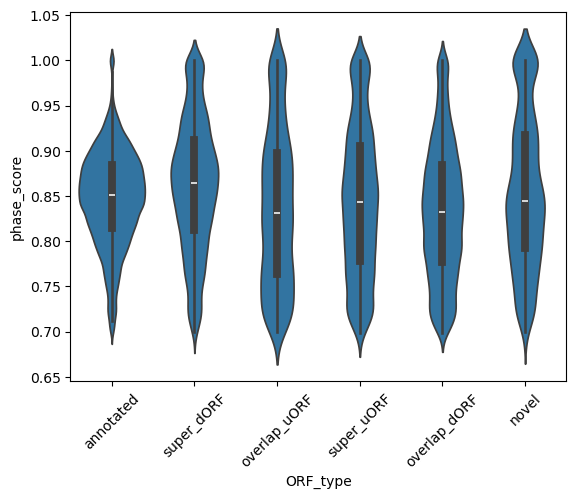

In [4]:
sns.violinplot(data=ribo_rt, x='ORF_type', y='phase_score')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'annotated'),
  Text(1, 0, 'super_uORF'),
  Text(2, 0, 'overlap_dORF'),
  Text(3, 0, 'super_dORF'),
  Text(4, 0, 'uORF'),
  Text(5, 0, 'overlap_uORF'),
  Text(6, 0, 'dORF'),
  Text(7, 0, 'novel')])

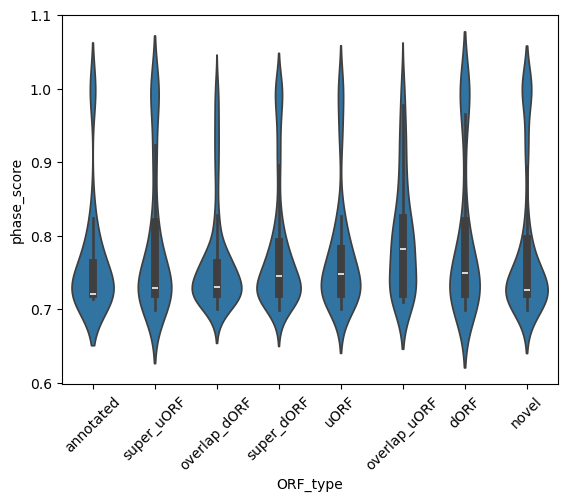

In [5]:
sns.violinplot(data=rna_rt, x='ORF_type', y='phase_score')
plt.xticks(rotation=45)

#### Performance assessment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyranges as pr

In [2]:
rna_rt = pd.read_csv('../results/wu_2024_datasets/ribotricer/SRR15700002_7_translating_ORFs.tsv', sep='\t')
rna_rt = rna_rt[rna_rt.phase_score>0.699].copy()
rna_rt['y_pred'] = 1
rna_rt.value_counts('ORF_type')

ORF_type
super_dORF      534
novel           458
overlap_dORF    278
super_uORF      161
dORF            149
uORF            147
annotated       101
overlap_uORF     98
Name: count, dtype: int64

In [3]:
bperf = pd.read_pickle('../results/wu_2024_datasets/riboss/boss_perf.pkl.gz')
bperf.drop('y_pred', axis=1, inplace=True)

rt_fp = pd.merge(bperf[~bperf.id.str.contains('uORF')],rna_rt[['ORF_ID','y_pred']].rename(columns={'ORF_ID':'id'}))

of_rt_id = pd.read_csv('../ref/tair10/orf_finder_ribotricer.intersection.txt', sep='\t')
of_rt_id['y_true'] = -1
of_rt_id['y_pred'] =-1
of_rt_id.drop('oid', axis=1, inplace=True)
of_rt_id.columns = ['id','y_true','y_pred']

rtrna = pd.concat([rt_fp,of_rt_id]).drop_duplicates('id')
rtrna = pd.merge(bperf[['id']],rtrna)

##### Get ribotricer predicted ORFs for ribosome profiling

In [4]:
rs_rt = pd.read_csv('../ref/tair10/Araport11_GTF_genes_transposons.ribotricer.txt', sep='\t', header=None)
rs_rt['ORF_ID'] = rs_rt[3].str.split('|').str[0] + '_' + rs_rt[1].astype(str) + '_' + rs_rt[2].astype(str) + '_' + rs_rt[4].astype(str)
rs_rt.rename(columns={9:'Araport_uORF'}, inplace=True)

rs_rt['ORF_length'] = rs_rt[16].apply(lambda x: np.sum([int(i) for i in x.split(',')[:-1]]))
rs_rt = rs_rt[(rs_rt[4]+3)==rs_rt.ORF_length].copy()
rs_rt.drop_duplicates('Araport_uORF').shape

(81, 21)

In [5]:
ribo_rt = pd.read_csv('../results/wu_2024_datasets/ribotricer/SRR15700008_13_translating_ORFs.tsv', sep='\t')
ribo_rt = ribo_rt[ribo_rt.phase_score>0.699].copy()
ribo_rt.value_counts('ORF_type')

ORF_type
annotated       39477
overlap_dORF    16134
super_dORF      10906
super_uORF       8605
overlap_uORF     2693
novel            2496
Name: count, dtype: int64

In [6]:
rsi = pd.read_csv('../ref/tair10/Araport_uORF.intersection.txt')
rsi['y_true'] = 1
rtribo = pd.merge(rsi,rs_rt)[['Araport_uORF','ORF_ID','y_true']].drop_duplicates().copy()

rtribo = pd.merge(rtribo,ribo_rt,on='ORF_ID')[['Araport_uORF','y_true']].drop_duplicates()
rtribo['y_pred'] = 1
rtribo.columns = ['id','y_true','y_pred']

In [7]:
rtribo = pd.merge(bperf[bperf.id.str.contains('uORF')],rtribo, how='left')
rtribo.fillna(-1, inplace=True)
rtribo['y_pred'] = rtribo.y_pred.astype(int)

rperf = pd.concat([rtribo,rtrna])
rperf.value_counts(['y_true','y_pred'])

y_true  y_pred
-1      -1        108639
         1           671
 1       1            46
        -1            22
Name: count, dtype: int64

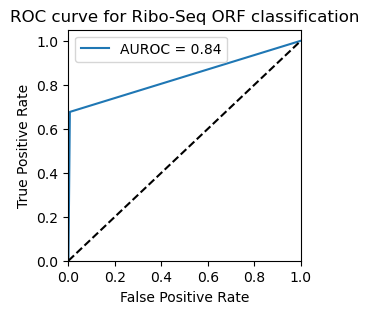

In [8]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, matthews_corrcoef, f1_score


fpr, tpr, thresholds = roc_curve(rperf.y_true, rperf.y_pred) 
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(3,3))  
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Ribo-Seq ORF classification')
plt.legend()

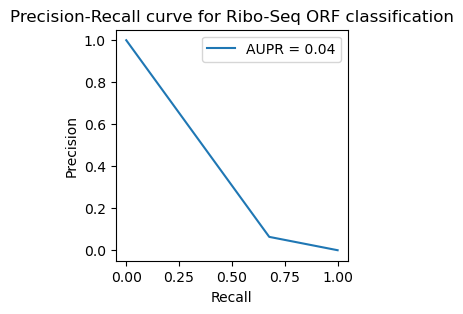

In [9]:
precision, recall, thresholds = precision_recall_curve(rperf.y_true, rperf.y_pred)
average_precision = average_precision_score(rperf.y_true, rperf.y_pred)

plt.figure(figsize=(3,3))
plt.plot(recall, precision, label='AUPR = %0.2f' % average_precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall curve for Ribo-Seq ORF classification")
plt.legend()

In [10]:
matthews_corrcoef(rperf.y_true, rperf.y_pred)

0.20705131008415173

In [11]:
f1_score(rperf.y_true, rperf.y_pred)

0.11719745222929936